In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train,y_train), (X_test, y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 76s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test= y_test.reshape(-1,)

In [10]:
classes= ['airplane','automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse','ship','truck']

## FUNCTION FOR VIEWING ITEM

In [11]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

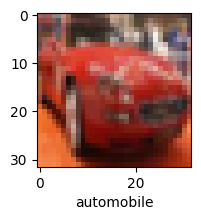

In [12]:
plot_sample(X_train, y_train,5)

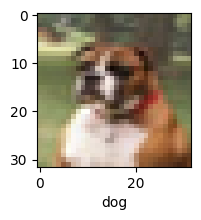

In [13]:
plot_sample(X_train, y_train,675)

## NORMALISATION

In [14]:
X_train= X_train/255.0
X_test= X_test/255

## BUILDING CNN FOR CLASSIFICATION

In [17]:


ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 162s 103ms/step - loss: 1.8087 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 149s 96ms/step - loss: 1.6231 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.5392 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4797 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4289 - accuracy: 0.4975


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

print("classificaation report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
classificaation report: 
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.63      0.44      0.52      1000
           2       0.46      0.20      0.28      1000
           3       0.35      0.31      0.33      1000
           4       0.42      0.46      0.44      1000
           5       0.39      0.36      0.38      1000
           6       0.53      0.52      0.53      1000
           7       0.63      0.48      0.54      1000
           8       0.52      0.71      0.60      1000
           9       0.41      0.74      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [19]:
import seaborn as sns


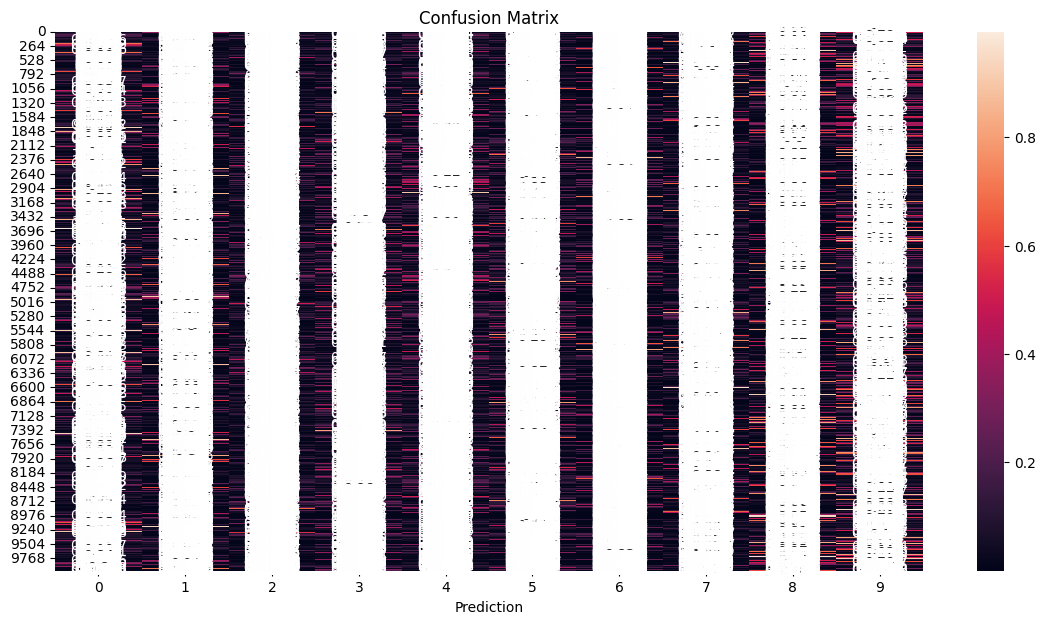

In [20]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot= True)
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

## CNN MODEL TO TRAIN IMAGES

In [23]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size= (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')


    ])

In [27]:
cnn.compile(optimizer="adam",
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [29]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.5646 - accuracy: 0.8014
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.5300 - accuracy: 0.8162
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5020 - accuracy: 0.8225
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.4649 - accuracy: 0.8351
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.4424 - accuracy: 0.8438
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4091 - accuracy: 0.8553
Epoch 7/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.3859 - accuracy: 0.8645
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3610 - accuracy: 0.8729
Epoch 9/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.3397 - accuracy: 0.8796
Epoch 10/10
1563/1563 [==============================] - 66s 42

In [30]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 1.3550 - accuracy: 0.6773


[1.3550347089767456, 0.677299976348877]

In [31]:
y_pred= cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[3.3474011e-05, 3.6095187e-08, 5.7951757e-04, 8.1467819e-01,
        1.4497676e-04, 4.0460243e-03, 1.8047830e-01, 3.9080929e-05,
        3.7322729e-07, 1.9538264e-08],
       [1.7222075e-06, 7.9042357e-01, 3.1283664e-13, 3.6740538e-11,
        2.7527798e-14, 7.9274342e-14, 3.6846897e-09, 1.8390532e-14,
        2.0956188e-01, 1.2723193e-05],
       [9.6112145e-03, 7.1480400e-03, 3.0334755e-07, 1.7862507e-06,
        2.1903902e-07, 1.6716821e-07, 8.9768790e-08, 1.5514082e-04,
        9.8281527e-01, 2.6787145e-04],
       [9.9930960e-01, 6.2885592e-05, 3.1238313e-05, 5.0768944e-07,
        8.4671041e-07, 5.7863172e-09, 2.7294649e-09, 3.6589771e-08,
        5.9338950e-04, 1.4604976e-06],
       [4.3620774e-09, 9.9044095e-10, 3.5646886e-03, 7.8454422e-04,
        9.9458367e-01, 9.7621203e-05, 9.6288597e-04, 6.1707378e-06,
        4.7752462e-07, 2.1439465e-12]], dtype=float32)

In [32]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

## CHECKING PREDICTIONS

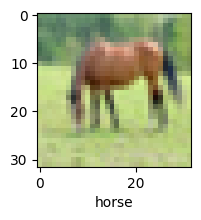

In [34]:
plot_sample(X_test, y_test, 60)

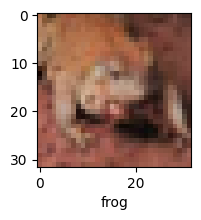

In [40]:
plot_sample(X_test, y_test,5)

In [39]:
classes[y_classes[60]]

'horse'

In [41]:
classes[y_classes[5]]

'frog'